In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
flights=pd.read_csv('flights.csv',low_memory=False)
flights=flights.sample(n=5000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5628,2015,1,1,4,OO,5396,N908SW,SPI,ORD,1225,...,1328.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1522,2015,1,1,4,DL,1169,N378DA,MIA,LAX,755,...,1052.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9321,2015,1,1,4,F9,1356,N227FR,IAD,TPA,1620,...,1944.0,54.0,0,0,NaN,0.0,0.0,0.0,54.0,0.0
1368,2015,1,1,4,US,582,N823AW,LAX,PHX,740,...,954.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5096,2015,1,1,4,WN,743,N374SW,MCO,ATL,1155,...,1311.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape

(5000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               6
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME          185
DEPARTURE_DELAY         185
TAXI_OUT                186
WHEELS_OFF              186
SCHEDULED_TIME            0
ELAPSED_TIME            196
AIR_TIME                196
DISTANCE                  0
WHEELS_ON               191
TAXI_IN                 191
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME            191
ARRIVAL_DELAY           196
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    4812
AIR_SYSTEM_DELAY       4078
SECURITY_DELAY         4078
AIRLINE_DELAY          4078
LATE_AIRCRAFT_DELAY    4078
WEATHER_DELAY          4078
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

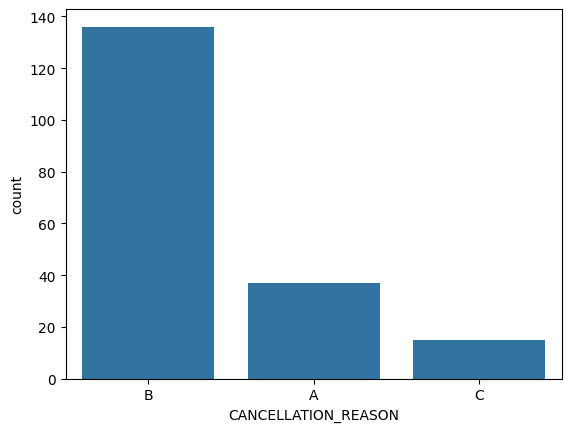

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security 

We can observe from graph easily that mostly weather is responsible for delays of flight.

<Axes: xlabel='MONTH', ylabel='count'>

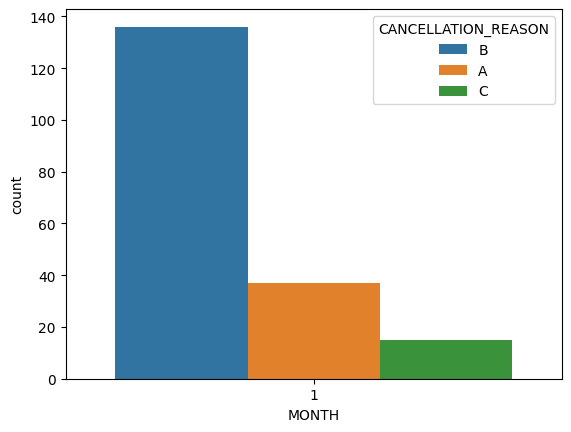

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

C:\Users\HP\AppData\Local\Temp\ipykernel_3368\123585846.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


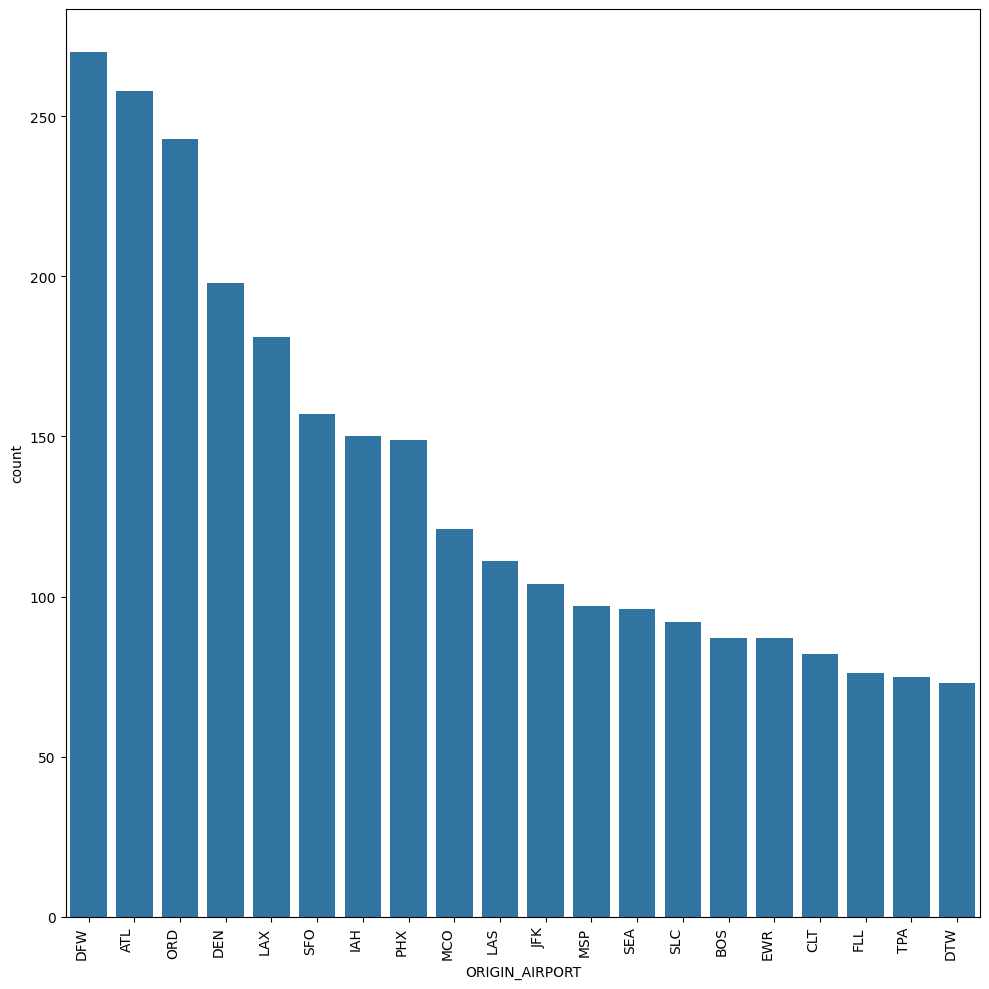

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

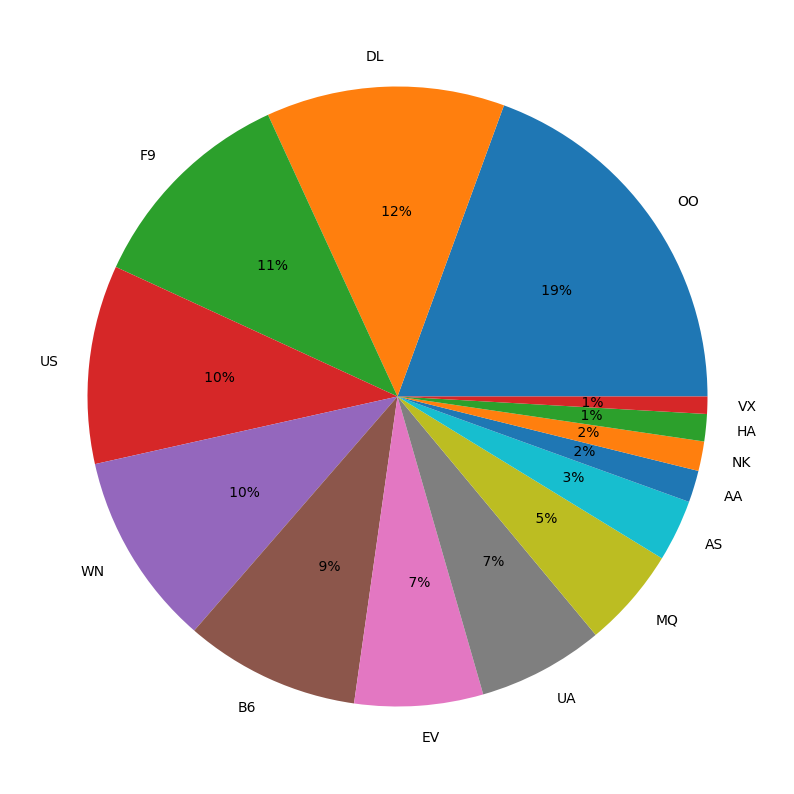

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3368\2085452572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(),annot = True)


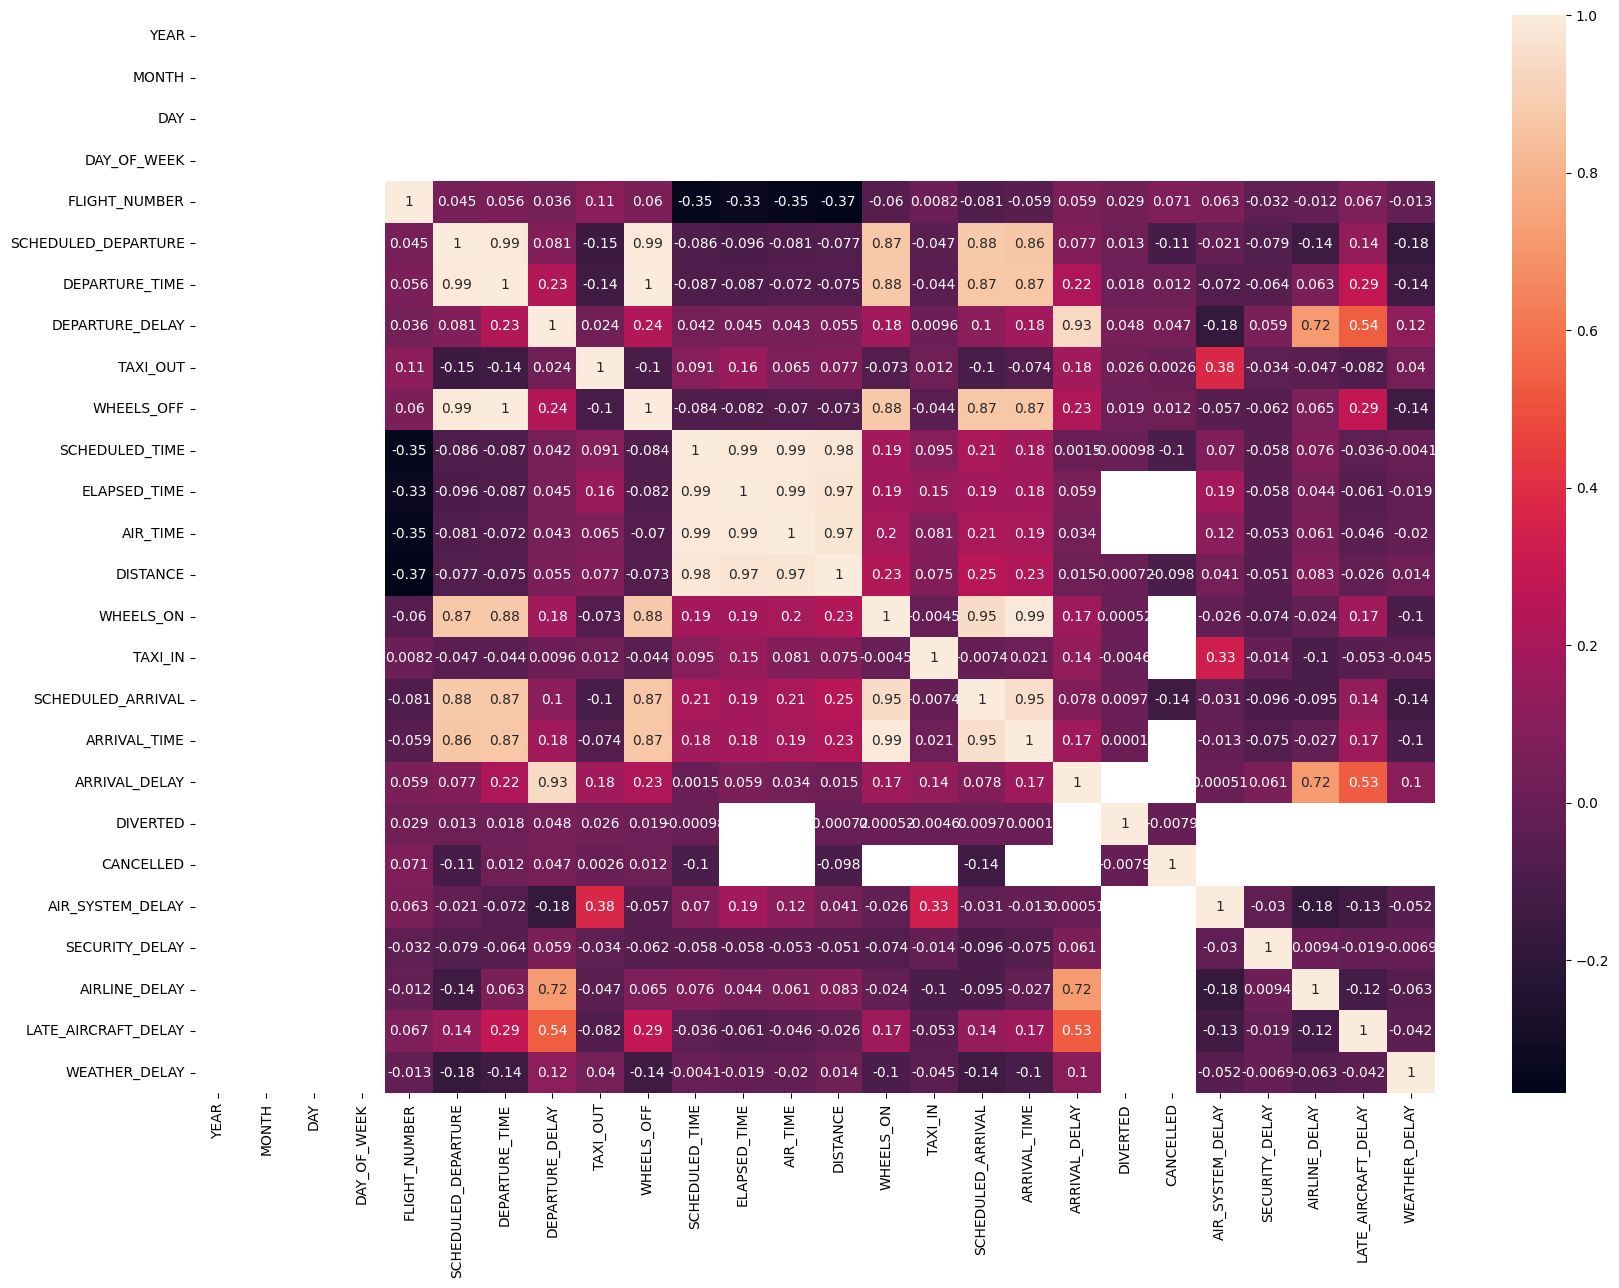

In [10]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.


In [11]:
corr=flights.corr()
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_3368\3193331825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=flights.corr()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLIGHT_NUMBER,NaN,NaN,NaN,NaN,1.000000,0.045073,0.055593,0.035635,0.107397,0.059662,...,-0.081323,-0.058776,0.059432,0.028832,0.071026,0.062671,-0.032186,-0.012290,0.066801,-0.013122
SCHEDULED_DEPARTURE,NaN,NaN,NaN,NaN,0.045073,1.000000,0.987118,0.080929,-0.146172,0.986082,...,0.878585,0.861896,0.077405,0.012781,-0.109804,-0.021451,-0.078746,-0.141781,0.138525,-0.180319
DEPARTURE_TIME,NaN,NaN,NaN,NaN,0.055593,0.987118,1.000000,0.233565,-0.138800,0.998061,...,0.870593,0.869271,0.218788,0.018292,0.012068,-0.072114,-0.063871,0.062732,0.286374,-0.144555
DEPARTURE_DELAY,NaN,NaN,NaN,NaN,0.035635,0.080929,0.233565,1.000000,0.023982,0.235126,...,0.104495,0.178722,0.932523,0.047847,0.047265,-0.181624,0.058768,0.719991,0.539678,0.117965
TAXI_OUT,NaN,NaN,NaN,NaN,0.107397,-0.146172,-0.138800,0.023982,1.000000,-0.104369,...,-0.102449,-0.073903,0.179956,0.026284,0.002620,0.378179,-0.034184,-0.046888,-0.081623,0.039861
WHEELS_OFF,NaN,NaN,NaN,NaN,0.059662,0.986082,0.998061,0.235126,-0.104369,1.000000,...,0.870075,0.869872,0.225947,0.019454,0.012354,-0.057191,-0.061854,0.064865,0.285723,-0.142574


In [12]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [13]:
airport = pd.read_csv('airports.csv',low_memory=False)
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [14]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5628,1,1,4,OO,SPI,ORD,1225,8.0,174,-1.0
1522,1,1,4,DL,MIA,LAX,755,-2.0,2342,-3.0
9321,1,1,4,F9,IAD,TPA,1620,63.0,811,54.0
1368,1,1,4,US,LAX,PHX,740,-8.0,370,-20.0
5096,1,1,4,WN,MCO,ATL,1155,-6.0,404,-24.0
...,...,...,...,...,...,...,...,...,...,...
6534,1,1,4,WN,MDW,ALB,1325,11.0,717,-7.0
7187,1,1,4,WN,ATL,CAK,1405,-2.0,528,-8.0
8853,1,1,4,OO,MBS,ORD,1553,26.0,222,11.0
8653,1,1,4,WN,ONT,DEN,1540,35.0,819,50.0


In [15]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

271
263
14


In [16]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5628,1,1,4,OO,SPI,ORD,1225,8.0,174,-1.0
1522,1,1,4,DL,MIA,LAX,755,-2.0,2342,-3.0
9321,1,1,4,F9,IAD,TPA,1620,63.0,811,54.0
1368,1,1,4,US,LAX,PHX,740,-8.0,370,-20.0
5096,1,1,4,WN,MCO,ATL,1155,-6.0,404,-24.0
...,...,...,...,...,...,...,...,...,...,...
6534,1,1,4,WN,MDW,ALB,1325,11.0,717,-7.0
7187,1,1,4,WN,ATL,CAK,1405,-2.0,528,-8.0
8853,1,1,4,OO,MBS,ORD,1553,26.0,222,11.0
8653,1,1,4,WN,ONT,DEN,1540,35.0,819,50.0


In [17]:
flights.shape

(4804, 10)

In [18]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5628,1,1,WEDNESDAY,OO,SPI,ORD,1225,8.0,174,-1.0
1522,1,1,WEDNESDAY,DL,MIA,LAX,755,-2.0,2342,-3.0
9321,1,1,WEDNESDAY,F9,IAD,TPA,1620,63.0,811,54.0
1368,1,1,WEDNESDAY,US,LAX,PHX,740,-8.0,370,-20.0
5096,1,1,WEDNESDAY,WN,MCO,ATL,1155,-6.0,404,-24.0
...,...,...,...,...,...,...,...,...,...,...
6534,1,1,WEDNESDAY,WN,MDW,ALB,1325,11.0,717,-7.0
7187,1,1,WEDNESDAY,WN,ATL,CAK,1405,-2.0,528,-8.0
8853,1,1,WEDNESDAY,OO,MBS,ORD,1553,26.0,222,11.0
8653,1,1,WEDNESDAY,WN,ONT,DEN,1540,35.0,819,50.0


In [19]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TTN,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YUM
5628,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1522,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9321,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8853,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_TTN', 'DESTINATION_AIRPORT_TUL',
       'DESTINATION_AIRPORT_TUS', 'DESTINATION_AIRPORT_TVC',
       'DESTINATION_AIRPORT_TYS', 'DESTINATION_AIRPORT_UST',
       'DESTINATION_AIRPORT_VPS', 'DESTINATION_AIRPORT_WRG',
       'DESTINATION_AIRPORT_XNA', 'DESTINATION_AIRPORT_YUM'],
      dtype='object', length=530)

In [21]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [22]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5628,1,1,1225,8.0,174,-1.0
1522,1,1,755,-2.0,2342,-3.0
9321,1,1,1620,63.0,811,54.0
1368,1,1,740,-8.0,370,-20.0
5096,1,1,1155,-6.0,404,-24.0
...,...,...,...,...,...,...
6534,1,1,1325,11.0,717,-7.0
7187,1,1,1405,-2.0,528,-8.0
8853,1,1,1553,26.0,222,11.0
8653,1,1,1540,35.0,819,50.0


In [24]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_TTN,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YUM
5628,1,1,1225,8.0,174,-1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,1,1,755,-2.0,2342,-3.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9321,1,1,1620,63.0,811,54.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,1,1,740,-8.0,370,-20.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5096,1,1,1155,-6.0,404,-24.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,1,1,1325,11.0,717,-7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7187,1,1,1405,-2.0,528,-8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8853,1,1,1553,26.0,222,11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8653,1,1,1540,35.0,819,50.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.shape

(4804, 536)

In [89]:
final_data = data.sample(n=4800)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_TTN,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YUM
4626,1,1,1125,-8.0,680,-14.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46,1,1,220,-11.0,1773,-36.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7891,1,1,1452,0.0,1092,-20.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8683,1,1,1541,2.0,689,-15.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5615,1,1,1225,4.0,862,-10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,1,1,1030,2.0,2565,-9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6471,1,1,1320,8.0,641,26.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,1,1,700,-1.0,414,-6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4657,1,1,1127,5.0,201,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
final_data.shape

(4800, 536)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [92]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [93]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_TTN,DESTINATION_AIRPORT_TUL,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YUM
4626,1,1,1125,680,-14.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,1,1,220,1773,-36.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7891,1,1,1452,1092,-20.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8683,1,1,1541,689,-15.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5615,1,1,1225,862,-10.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,1,1,1030,2565,-9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6471,1,1,1320,641,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,1,1,700,414,-6.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4657,1,1,1127,201,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
Y

4626    -8.0
46     -11.0
7891     0.0
8683     2.0
5615     4.0
        ... 
3766     2.0
6471     8.0
847     -1.0
4657     5.0
2383    -4.0
Name: DEPARTURE_DELAY, Length: 4800, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [96]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
y_pred = reg_rf.predict(X_test)

In [98]:
reg_rf.score(X_train,y_train)

0.987912951527378

In [99]:
reg_rf.score(X_test,y_test)

0.9177647070637888

In [100]:
metrics.r2_score(y_test,y_pred)

0.9177647070637888

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5.473052083333333
MSE: 64.4028209375
RMSE: 8.025136817369534


In [102]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
4495,2.0,1.99
6859,0.0,-2.45
2380,-5.0,-1.26
2247,8.0,8.11
5279,-1.0,-2.90
...,...,...
5327,8.0,0.79
4446,30.0,8.19
4991,-4.0,2.66
8157,-8.0,-7.05


In [103]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [104]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [105]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [106]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.7s
[CV] END max_depth=20, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [107]:
rf_random.best_params_

{'n_estimators': 44,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [108]:
p=rf_random.predict(X_test)

In [109]:
metrics.r2_score(y_test,p)

0.6577340278762369

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 8.8590231706173
MSE: 268.0466418814176
RMSE: 16.37213003495323


In [111]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
4495,2.0,0.424505
6859,0.0,-0.240019
2380,-5.0,-1.601802
2247,8.0,4.540837
5279,-1.0,1.644109
...,...,...
5327,8.0,4.505351
4446,30.0,14.655710
4991,-4.0,0.751708
8157,-8.0,1.370695


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [113]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.538501208470781
MSE: 63.66218107065321
RMSE: 7.978858381413548


In [115]:
metrics.r2_score(y_test,pre)

0.9187104224148211

In [116]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
4495,2.0,-1.486238
6859,0.0,-2.750313
2380,-5.0,-1.346166
2247,8.0,13.359908
5279,-1.0,-1.636439
...,...,...
5327,8.0,0.710449
4446,30.0,14.167020
4991,-4.0,0.473107
8157,-8.0,-4.706727
